## Figures shoreline evolution forecasting

In [3]:
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import project_path
from project_path import (
    module_path,
    configuration_dir, 
    data_dir, 
    report_dir,
    model_dir
)
from shorelineforecasting.utils.configs import GluonConfigs

### Load data

In [4]:
tf = GluonConfigs.load_data()
tf = tf.set_index('transect_id')
tf = tf.dropna(thresh=33)
print(f"Transects included in dataset: {tf.shape[0]}; timesteps: {tf.shape[1]}")
tf.head()

Transects included in dataset: 37111; timesteps: 33


,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
transect_id,,,,,,,,,,,,,,,,,,,,,
BOX_051_151_15,677.32043,695.66370,713.29486,682.1743,688.23425,672.13007,700.43286,693.43460,699.38560,687.97950,...,700.6640,712.41740,708.45123,740.33240,680.42510,758.35150,754.49695,763.04297,743.29680,779.41570
BOX_051_151_18,768.93800,769.23883,762.44300,755.8622,761.79663,760.51710,763.30505,761.81360,769.22100,765.47060,...,763.1057,759.72600,766.23150,770.77130,798.26830,797.99615,803.90950,797.90780,798.18830,803.68256
BOX_051_151_21,711.41626,684.20540,695.49817,701.6695,705.29990,703.61470,707.69403,692.90360,704.68280,704.99945,...,825.8698,820.51720,820.68680,842.18097,850.45460,775.96700,883.04240,867.92426,877.37415,874.50244
BOX_051_151_30,795.81573,820.63700,799.72380,799.8664,823.56260,822.07300,823.56800,823.73300,824.58400,824.33360,...,823.7820,823.15674,823.65790,821.31860,818.85803,817.31220,822.92970,818.73350,822.18480,818.73480
BOX_051_151_32,242.70204,238.05159,229.93718,244.0620,247.68105,257.49900,302.69217,301.27722,301.12033,316.40414,...,301.1231,313.63553,313.09814,312.90347,306.18658,294.18326,297.23654,302.88650,323.85840,304.36823


In [5]:
item_metrics = pd.read_csv(os.path.join(data_dir, "item-metrics.csv"))
item_metrics.groupby('predictor').mean()

,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,...,QuantileLoss[0.6],Coverage[0.6],QuantileLoss[0.7],Coverage[0.7],QuantileLoss[0.8],Coverage[0.8],QuantileLoss[0.9],Coverage[0.9],predictor_id,MAE
predictor,,,,,,,,,,,,,,,,,,,,,
ARIMA,2032.244147,119.923749,254.444294,36.349185,13.435316,1.375208,13.410326,0.877144,NaN,16.977724,...,121.775083,0.600823,117.404225,0.692740,104.193204,0.779623,78.944986,0.864838,467,17.131964
DeepAREstimator,1930.253426,122.958562,254.444294,36.349185,13.435316,1.388775,9.956959,0.833427,NaN,16.241198,...,123.708696,0.572965,118.209791,0.684233,104.751543,0.788411,79.265118,0.888085,439,17.565509
DeepStateEstimator,2059.614156,129.019802,254.444294,36.349185,13.435316,1.441471,12.751776,0.822450,NaN,18.554417,...,132.125393,0.635199,128.428669,0.722947,114.988846,0.797730,87.436944,0.866820,441,18.431400
ETS,1997.539366,116.387965,254.444294,36.349185,13.435316,1.345202,11.883666,0.835794,NaN,16.559301,...,117.613103,0.598332,112.791161,0.687928,99.493468,0.775334,74.852122,0.862113,468,16.626852
MQCNNEstimator,NaN,120.368131,254.444294,36.349185,13.435316,1.380416,11.094521,0.821759,NaN,NaN,...,119.095454,0.576656,112.432423,0.679283,99.077256,0.776589,74.584344,0.860746,440,17.195447
SimpleFeedForwardEstimator,1817.349159,118.776681,254.444294,36.349185,13.435316,1.358230,11.447549,0.820460,NaN,17.148462,...,116.223539,0.570751,109.412940,0.688929,96.973348,0.800748,74.357232,0.907594,438,16.968097
SimpleLSTM,1685.760859,132.753241,258.421863,36.917409,13.430902,1.657623,20.414388,0.919317,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,471,18.964749
linregress,2510.330038,140.089027,254.444294,36.349185,13.435316,1.540923,14.021865,0.828920,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470,20.012718


In [6]:
sites = pd.read_csv("/media/storage/data/shorelines/sites-gluonts-prepared-37k.csv")
sites = sites.loc[sites['transect_id'].isin(tf.index)]
print(f"Transects included in dataset: {sites.shape[0]}; metadata columns: {sites.shape[1]}")
sites.head()

Transects included in dataset: 37111; metadata columns: 27


,transect_id,country_id,continent,country_name,changerate,changerate_unc,flag_sandy,no_shorelines,RMSE,Timespan,...,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,coastline_idint,geometry,dbscan_cluster,fcluster,optics_clusters
0,BOX_051_170_3,ARG,South America,Argentina,0.389332,0.344834,True,33.0,18.281954,32.0,...,-36.378387,-56.709120,-36.376892,-56.700333,-36.375397,7427,POINT (-56.70912170410156 -36.37689208984375),0,2455,0
1,BOX_051_170_4,ARG,South America,Argentina,0.501007,0.390176,True,33.0,20.685827,32.0,...,-36.374847,-56.710050,-36.373356,-56.701260,-36.371860,7427,POINT (-56.71004867553711 -36.37335586547852),0,2455,0
2,BOX_051_170_5,ARG,South America,Argentina,0.831012,0.331491,True,33.0,17.574545,32.0,...,-36.371933,-56.711193,-36.369860,-56.702587,-36.367786,7427,POINT (-56.7111930847168 -36.3698616027832),0,2455,0
3,BOX_051_170_6,ARG,South America,Argentina,1.471142,0.277497,True,33.0,14.711926,32.0,...,-36.368470,-56.712482,-36.366394,-56.703876,-36.364323,7427,POINT (-56.71248245239258 -36.36639404296875),0,2455,0
4,BOX_051_170_7,ARG,South America,Argentina,2.159336,0.288062,True,33.0,15.272047,32.0,...,-36.365000,-56.713768,-36.362930,-56.705162,-36.360855,7427,POINT (-56.71376800537109 -36.36293029785156),0,2455,0


In [7]:
from sklearn import preprocessing


transformations = {
    "standarize": preprocessing.StandardScaler(),
    "min-max-scale": preprocessing.MinMaxScaler()
}

rebase = lambda x: x-x[0]

def scale_df(df, method):
    x = df.values
    scaler = transformations[method]
    x_scaled = scaler.fit_transform(x)
    return pd.DataFrame(x_scaled, index=df.index, columns=df.columns)

tf_t = tf.apply(rebase, axis=1)
tf_z = scale_df(tf_t.T, method='standarize').T


### Matplotlib Configurations

In [8]:
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator
import matplotlib as mpl

plt.style.use(os.path.join(configuration_dir, 'PaperDoubleFig.mplstyle')) # for page wide figures

### Plot transects included in study

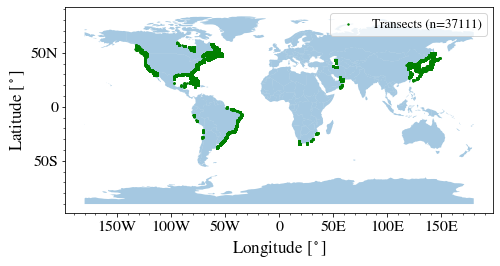

In [9]:
plt.style.use(os.path.join(configuration_dir, 'PaperDoubleFig.mplstyle')) # for page wide figures

import geopandas as gpd
from shapely.geometry import Point
from pyproj import CRS

def to_geodataframe(df: pd.DataFrame) -> gpd.GeoDataFrame:
    crs = CRS("epsg:4326")
    geometries = gpd.points_from_xy(df.Intersect_lon, df.Intersect_lat)
    return gpd.GeoDataFrame(df, crs=crs, geometry=geometries)

def plot_transects(ax, gdf: gpd.GeoDataFrame):
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))    
    world.plot(ax=ax, alpha=.4)
    gdf.plot(markersize=2, ax=ax, label=f"Transects (n={len(gdf)})", color='g')
    
    ax.set_xlabel('Longitude [$^\circ$]')
    ax.set_ylabel('Latitude [$^\circ$]')
    ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.set_xticklabels(['180W', '150W', '100W', '50W', '0', '50E', '100E', '150E', '180E'])
    ax.set_yticklabels(['90S', '50S', '0', '50N', '90N'])
    ax.legend(loc='upper right', frameon=True)
    
    return ax

# dataframe to geodataframe
geosites = to_geodataframe(sites)

# plot transects
fig, ax = plt.subplots()
plot_transects(ax, geosites)
# plt.savefig(os.path.join(report_dir, 'images/transects.pdf'), dpi=300)


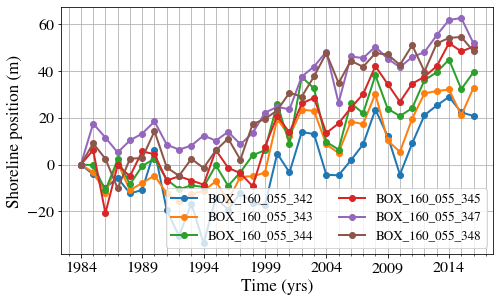

In [10]:
plt.style.use(os.path.join(configuration_dir, 'PaperDoubleFig.mplstyle')) # for page wide figures

def plot_ts_transects(ax, transects, df):
    df = df[df.index.isin(transects)]
    df = df.T
    df.plot(ax=ax, style='-o')
    
#     ax.set_ylim([530, 700])
    ax.set_ylabel('Shoreline position (m)')
    ax.set_xlabel('Time (yrs)')
    ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.grid(which='both')
    ax.legend(bbox_to_anchor=(1.0, -0.0), loc='lower right', frameon=True, ncol=2)
    return ax

duck = [f'BOX_160_055_3{i}' for i in np.arange(42, 50, 1)]

fig, ax = plt.subplots()
plot_ts_transects(ax, duck, tf_t)
plt.tight_layout()
# plt.savefig(os.path.join(report_dir, 'images/time-series-example.pdf'), dpi=300)
plt.show()

In [11]:
from sklearn import preprocessing


def bin_df(df, nbins=1000):
    lb, ub = df.values.min(), df.values.max()
    bins = np.linspace(lb, ub, nbins)
    return df.apply(lambda x: pd.cut(x, bins).value_counts())


standarized_tf = scale_df(tf.T, method='standarize').T
min_max_tf = scale_df(tf.T, method='min-max-scale').T

standarized_tf_bins = bin_df(standarized_tf)
min_max_tf_bins = bin_df(min_max_tf)

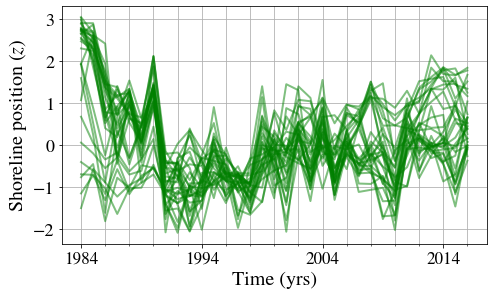

In [13]:
plt.style.use(os.path.join(configuration_dir, 'PaperSingleFig.mplstyle'))

def get_cluster_tf(tf, transects, method):
    clusters = sites.loc[sites['transect_id'].isin(transects)][method].unique()
    cluster_transects = sites.loc[sites[method].isin(clusters)]['transect_id'].to_list()
    return tf.loc[tf.index.isin(cluster_transects)]

tf_duck_dbscan = get_cluster_tf(tf_t, duck, method='dbscan_cluster')
tf_duck_fcluster = get_cluster_tf(tf_t, duck, method='fcluster')

duck_dbscan_z = scale_df(tf_duck_dbscan.T, method='standarize').T
duck_fcluster_z = scale_df(tf_duck_fcluster.T, method='standarize').T


def plot_multiple_ts(ax, tf):
    tf.plot(color='g', alpha=0.5, legend=False, ax=ax)
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.grid(which="both")
    ax.set_ylabel('Shoreline position ($z$)')
    ax.set_xlabel('Time (yrs)')
    return ax

fig, ax = plt.subplots()
plot_multiple_ts(ax, duck_dbscan_z.T)
# plt.savefig(os.path.join(report_dir, 'images/ts-duck-dbscan.pdf'), dpi=300)

/media/storage/dev/shorelineforecasting/shorelineforecasting/venv/lib/python3.8/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


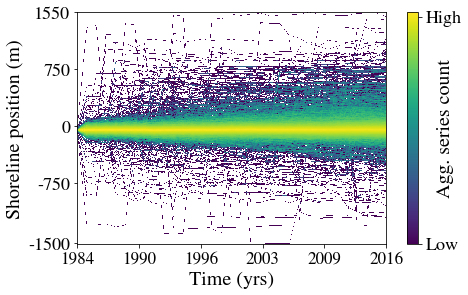

In [17]:
import datashader as ds
import datashader.transfer_functions as tfnc


def calc_extents(df):
    y_extent = (df.min().min(), df.max().max())
    x_extent = (int(df.columns.min()), int(df.columns.max()))
    return x_extent, y_extent


def scale_values_to_image_size(array: np.array, extent, range: int):
    """
    scales an Array to an Range
    :param array: is an 1-dimensional numpy array
    :param range: is the range [1:range]
    :return:
    """
    min = extent[0]
    max = extent[1]
    scale = np.vectorize(lambda v: ((v - min) / (max - min)) * (range - 1))
    return scale(array)


def convert_range(old_values, new_values, to_convert):
    old_min, old_max = min(old_values), max(old_values)
    new_min, new_max = min(new_values), max(new_values)
    old_range = (old_max - old_min)
    new_range = (new_max - new_min)
    f = lambda x: (((x - old_min) * new_range) / old_range) + new_min  
    return list(f(to_convert))


def plot_line_density(ax, tf, h=750, w=1000, xticks=6, yticks=None, ylabel='Shoreline position (m)'):
    dt_range, sds_range = calc_extents(tf.T)
    df = pd.DataFrame(scale_values_to_image_size(tf.T.values, sds_range, range=h))
    
    # Each column is one data sample
    df = tf.reset_index(drop=True)

    # Append row with nan-values
    df = df.append(pd.DataFrame([np.array([np.nan] * len(df.columns))], columns=df.columns, index=[np.nan]))

    # Reshape
    x, y = df.shape
    arr = df.values.reshape((x * y, 1), order='F')
    df_reshaped = pd.DataFrame(arr, columns=list('y'), index=np.tile(df.index.values, y))
    df_reshaped = df_reshaped.reset_index()
    df_reshaped.columns.values[0] = 'x'

    # Create canvas
    x_range, y_range = calc_extents(df.T)
    cvs = ds.Canvas(x_range=x_range, y_range=y_range, plot_height=h, plot_width=w)
    
    # Aggregate to heatmap
    aggs = cvs.line(df_reshaped, 'x', 'y', ds.count())
    heatmap_img = tfnc.Image(tfnc.shade(aggs, cmap=plt.cm.viridis))

    # plot, colorbar
    im = ax.imshow(heatmap_img.to_pil())
    cbar = fig.colorbar(im, fraction=0.03, pad=0.05, ticks=[0, 250])
    cbar.ax.set_yticklabels(['Low', 'High'])
    cbar.set_label('Agg. series count', labelpad=-25)

    # ticks
    if yticks is None:
        yticks = [min(sds_range), 0, max(sds_range)]
    
    ax.set_xticks(np.linspace(0, w, xticks))
    ax.set_yticks(convert_range(
        old_values=sds_range,
        new_values=[h, 0],
        to_convert=yticks
    ))
    
    ax.set_xticklabels(
        pd.date_range(
            start=f'{dt_range[0]}-01-01',
            end=f'{dt_range[1]}-01-01',
            periods=33/(xticks-1)
        ).strftime('%Y')
    )
    
    ax.set_yticklabels(
        np.flip(yticks).astype(int)
    )
    
    ax.set_ylabel(ylabel)
    ax.set_xlabel('Time (yrs)')   
    return ax   


plt.style.use(os.path.join(configuration_dir, 'PaperSingleFig.mplstyle'))


fig, ax = plt.subplots()    
plot_line_density(ax, tf_t.T, yticks=[-1500, -750, 0, 750, 1550])
# plt.savefig(os.path.join(report_dir, 'images/time-series.pdf'), dpi=300)
plt.show()

### Worst forecasts

/media/storage/dev/shorelineforecasting/shorelineforecasting/venv/lib/python3.8/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


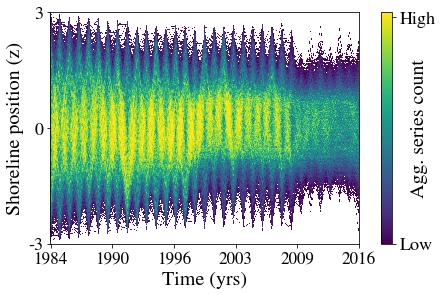

In [21]:
def plot_nlargest_series(tf, metrics, n, sample_size):
    nlarge = metrics['MASE'].nlargest(n)
    nlarge = np.random.choice(nlarge.index, size=sample_size)
    for i in nlarge:
        idx = metrics.iloc[i]['item_id']
        tf.loc[idx].plot()


def get_nlargest_tf(tf, metrics, filter_metric, npercent=0.05, pred_grouped=False, unique=True):
    if pred_grouped is True:
        transects = list()
        for gr, df in metrics.groupby('predictor'):
            n = int(len(df)*npercent)
            df = df.reset_index(drop=True)
            idx = df[filter_metric].nlargest(n).index
            transects.append(df.iloc[idx]['item_id'].to_list())
    else:
        nlarge = metrics[filter_metric].nlargest(int(len(metrics)*npercent))
        transects = metrics.iloc[nlarge.index]['item_id'].to_list()
    if unique is True: 
        return tf.loc[np.unique(transects)]
    return tf.loc[transects]


worst_fcst_tf = get_nlargest_tf(tf_t, item_metrics, filter_metric='MSE', npercent=0.05, pred_grouped=False, unique=False)


plt.style.use(os.path.join(configuration_dir, 'PaperSingleFig.mplstyle'))


fig, ax = plt.subplots()
plot_line_density(ax, scale_df(worst_fcst_tf.T, 'standarize'), ylabel='Shoreline position (z)')
# plt.savefig(os.path.join(report_dir, 'images/time-series-worst-predictions-mse.pdf'), dpi=300)

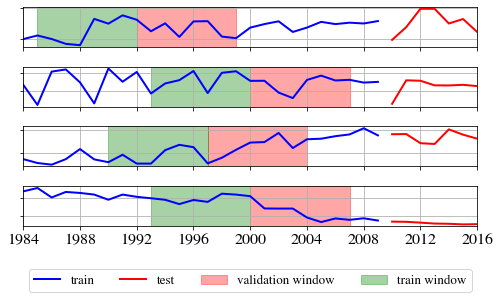

In [10]:
import matplotlib.dates as mdates

plt.style.use(os.path.join(configuration_dir, 'PaperDoubleFig.mplstyle')) # half page width 

def plot_ts_split(ax, ts, prediction_length, context_length=None):
    
    if context_length is None:
        context_length = 2*prediction_length
        
    upper_bound = np.random.randint(
        low=context_length + prediction_length,X
        high=len(ts) - prediction_length,
        size=1
    )
       
    dates = pd.date_range(start=ts.index[0], freq="AS", periods=len(ts))
    ax.plot(dates[:-prediction_length], ts[:-prediction_length].values, color='b', label='train')
    ax.plot(dates[-prediction_length:], ts[-prediction_length:].values, color='r', label='test')
    
    ax.set_xlim([dates[0], dates[-1]])
    ax.tick_params(labelleft=False)        
    ax.xaxis.set_major_locator(mdates.YearLocator(4)) 
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.grid(which="both")
    
    ax.axvspan(
        dates[upper_bound-prediction_length], 
        dates[upper_bound], 
        alpha=0.35, 
        color='red', 
        label='validation window'
    )
    ax.axvspan(
        dates[upper_bound-prediction_length-context_length], 
        dates[upper_bound-prediction_length], 
        alpha=0.35, 
        color='green', 
        label='train window'
    )
    
    return ax

nseries = 4
transects = tf.sample(nseries).index

fig, axes = plt.subplots(nrows=nseries, sharex=True)
for ax, transect in zip(axes.flatten(), transects):    
    plot_ts_split(
        ax=ax,
        ts=tf.loc[transect],
        prediction_length=7,
        context_length=7
    )
    
handles, labels = ax.get_legend_handles_labels()
fig.subplots_adjust(top=0.8, left=0.1, right=0.9, bottom=0.2)  # create some space below the plots by increasing the bottom-value
axes[-1].legend(loc='lower center', ncol=4, bbox_to_anchor=(0.5, -1.8))
# plt.savefig(os.path.join(report_dir, 'images/ts-batches.pdf'), dpi=300)



### Rank error measures

In [59]:
item_metrics.groupby(['predictor_id', 'predictor']).mean()

,,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,...,QuantileLoss[0.8],Coverage[0.8],QuantileLoss[0.9],Coverage[0.9],MAE,rank_MSE,rank_MAE,rank_MASE,rank_MAPE,rank_sMAPE
predictor_id,predictor,,,,,,,,,,,,,,,,,,,,,
438,SimpleFeedForwardEstimator,1817.349159,118.776681,254.444294,36.349185,13.435316,1.358230,11.447549,0.820460,NaN,17.148462,...,96.973348,0.800748,74.357232,0.907594,16.968097,125084.495540,141962.015777,140551.480477,143918.379483,144548.033777
439,DeepAREstimator,1930.253426,122.958562,254.444294,36.349185,13.435316,1.388775,9.956959,0.833427,NaN,16.241198,...,104.751543,0.788411,79.265118,0.888085,17.565509,125252.554135,143065.191911,142409.421519,143291.937188,146912.585783
440,MQCNNEstimator,NaN,120.368131,254.444294,36.349185,13.435316,1.380416,11.094521,0.821759,NaN,NaN,...,99.077256,0.776589,74.584344,0.860746,17.195447,NaN,142702.149215,140939.572741,143920.224327,145099.471693
441,DeepStateEstimator,2059.614156,129.019802,254.444294,36.349185,13.435316,1.441471,12.751776,0.822450,NaN,18.554417,...,114.988846,0.797730,87.436944,0.866820,18.431400,129488.768303,149259.810137,150600.481340,151725.362669,145182.624437
467,ARIMA,2032.244147,119.923749,254.444294,36.349185,13.435316,1.375208,13.410326,0.877144,NaN,16.977724,...,104.193204,0.779623,78.944986,0.864838,17.131964,125312.017165,144470.518930,143430.869257,143953.777344,151875.544421
468,ETS,1997.539366,116.387965,254.444294,36.349185,13.435316,1.345202,11.883666,0.835794,NaN,16.559301,...,99.493468,0.775334,74.852122,0.862113,16.626852,123707.676996,142775.438145,141349.297998,144806.077093,146710.291369
470,linregress,2510.330038,140.089027,254.444294,36.349185,13.435316,1.540923,14.021865,0.828920,NaN,NaN,...,NaN,NaN,NaN,NaN,20.012718,131144.862305,151161.227884,152599.143138,154082.038021,146465.230888
471,SimpleLSTM,1685.760859,132.753241,258.421863,36.917409,13.430902,1.657623,20.414388,0.919317,NaN,NaN,...,NaN,NaN,NaN,NaN,18.964749,149199.851078,172122.668032,175639.796065,161818.169569,160721.858369


In [61]:
def rank_metrics(df: pd.DataFrame, metrics: list) -> pd.DataFrame:
    for metric in metrics: 
        df[f"rank_{metric}"] = df[metric].rank()
    return df

target_metrics = ['MSE', 'MAE', 'MASE', 'MAPE', 'sMAPE']

ranked_metrics = rank_metrics(
    df=item_metrics,
    metrics=target_metrics
)

ranked_metrics.groupby(['predictor_id', 'predictor']).mean()


,,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,...,QuantileLoss[0.8],Coverage[0.8],QuantileLoss[0.9],Coverage[0.9],MAE,rank_MSE,rank_MAE,rank_MASE,rank_MAPE,rank_sMAPE
predictor_id,predictor,,,,,,,,,,,,,,,,,,,,,
438,SimpleFeedForwardEstimator,1817.349159,118.776681,254.444294,36.349185,13.435316,1.358230,11.447549,0.820460,NaN,17.148462,...,96.973348,0.800748,74.357232,0.907594,16.968097,125084.495540,141962.015777,140551.480477,143918.379483,144548.033777
439,DeepAREstimator,1930.253426,122.958562,254.444294,36.349185,13.435316,1.388775,9.956959,0.833427,NaN,16.241198,...,104.751543,0.788411,79.265118,0.888085,17.565509,125252.554135,143065.191911,142409.421519,143291.937188,146912.585783
440,MQCNNEstimator,NaN,120.368131,254.444294,36.349185,13.435316,1.380416,11.094521,0.821759,NaN,NaN,...,99.077256,0.776589,74.584344,0.860746,17.195447,NaN,142702.149215,140939.572741,143920.224327,145099.471693
441,DeepStateEstimator,2059.614156,129.019802,254.444294,36.349185,13.435316,1.441471,12.751776,0.822450,NaN,18.554417,...,114.988846,0.797730,87.436944,0.866820,18.431400,129488.768303,149259.810137,150600.481340,151725.362669,145182.624437
467,ARIMA,2032.244147,119.923749,254.444294,36.349185,13.435316,1.375208,13.410326,0.877144,NaN,16.977724,...,104.193204,0.779623,78.944986,0.864838,17.131964,125312.017165,144470.518930,143430.869257,143953.777344,151875.544421
468,ETS,1997.539366,116.387965,254.444294,36.349185,13.435316,1.345202,11.883666,0.835794,NaN,16.559301,...,99.493468,0.775334,74.852122,0.862113,16.626852,123707.676996,142775.438145,141349.297998,144806.077093,146710.291369
470,linregress,2510.330038,140.089027,254.444294,36.349185,13.435316,1.540923,14.021865,0.828920,NaN,NaN,...,NaN,NaN,NaN,NaN,20.012718,131144.862305,151161.227884,152599.143138,154082.038021,146465.230888
471,SimpleLSTM,1685.760859,132.753241,258.421863,36.917409,13.430902,1.657623,20.414388,0.919317,NaN,NaN,...,NaN,NaN,NaN,NaN,18.964749,149199.851078,172122.668032,175639.796065,161818.169569,160721.858369


In [189]:
sort_frame(ranked_metrics, 'predictor', sorter).groupby('predictor', sort=False).mean().to_csv(os.path.join(data_dir, 'error-measures.csv'), index=True, header=True)

### Aggregate item metrics

In [194]:
agg_funs = {
    "MSE": "mean",
    "MAE": "mean",
    "abs_error": "sum",
    "abs_target_sum": "sum",
    "abs_target_mean": "mean",
    "seasonal_error": "mean",
    "MASE": "mean",
    "MAPE": "mean",
    "sMAPE": "mean",
    "OWA": "mean",
    "MSIS": "mean",
}

def get_aggregate_metrics(item_metrics, agg_funs):
    res = list()
    for i, gr in item_metrics.groupby('predictor'):
        
        totals = {key: gr[key].agg(agg) for key, agg in agg_funs.items()}
        totals['predictor'] = i

        # derived metrics based on previous aggregate metrics
        totals["RMSE"] = np.sqrt(totals["MSE"])

        flag = totals["abs_target_mean"] <= 1e-8
        totals["NRMSE"] = np.divide(
            totals["RMSE"] * (1 - flag), totals["abs_target_mean"] + flag
        )

        flag = totals["abs_target_sum"] <= 1e-8
        totals["ND"] = np.divide(
            totals["abs_error"] * (1 - flag), totals["abs_target_sum"] + flag
        )
        
        res.append(totals)
    return pd.DataFrame(res)

agg_metrics = get_aggregate_metrics(item_metrics, agg_funs)
agg_metrics.set_index('predictor')

,MSE,MAE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,RMSE,NRMSE,ND
predictor,,,,,,,,,,,,,,
ARIMA,2032.244147,17.131964,4.450490e+06,9.442682e+06,36.349185,13.435316,1.375208,13.410326,0.877144,NaN,16.977724,45.080419,1.240204,0.471316
DeepAREstimator,1930.253426,17.565509,4.563115e+06,9.442682e+06,36.349185,13.435316,1.388775,9.956959,0.833427,NaN,16.241198,43.934649,1.208683,0.483244
DeepStateEstimator,2059.614156,18.431400,4.788054e+06,9.442682e+06,36.349185,13.435316,1.441471,12.751776,0.822450,NaN,18.554417,45.382972,1.248528,0.507065
ETS,1997.539366,16.626852,4.319274e+06,9.442682e+06,36.349185,13.435316,1.345202,11.883666,0.835794,NaN,16.559301,44.693840,1.229569,0.457420
MQCNNEstimator,NaN,17.195447,4.466982e+06,9.442682e+06,36.349185,13.435316,1.380416,11.094521,0.821759,NaN,NaN,NaN,NaN,0.473063
SimpleFeedForwardEstimator,1817.349159,16.968097,4.407921e+06,9.442682e+06,36.349185,13.435316,1.358230,11.447549,0.820460,NaN,17.148462,42.630378,1.172801,0.466808
SimpleLSTM,1685.760859,18.964749,4.925145e+06,9.587451e+06,36.917409,13.430902,1.657623,20.414388,0.919317,NaN,NaN,41.058018,1.112159,0.513707
linregress,2510.330038,20.012718,5.198844e+06,9.442682e+06,36.349185,13.435316,1.540923,14.021865,0.828920,NaN,NaN,50.103194,1.378386,0.550569


In [195]:
agg_metrics.set_index('predictor').to_csv(os.path.join(data_dir, "error-measures.csv"), index=True, header=True)

### Visualization settings

In [ ]:
import seaborn as sns 


sorter = [
    "linregress", "ETS", "ARIMA", "SimpleLSTM", 
    "SimpleFeedForwardEstimator","DeepAREstimator", 
    "MQCNNEstimator", "DeepStateEstimator"
]

legend_labels = [
    "Linear regr", "ETS", "ARIMA", "SimpleLSTM", "SimpleFFN", 
    "DeepAR", "MQCNN", "DeepSSM"
]


def sort_frame(df: pd.DataFrame, target: str, sorter: list)-> dict:
    df[f'{target}_cat'] = pd.Categorical(
        df[target], 
        categories=sorter, 
        ordered=True
    )
    df = df.sort_values(f'{target}_cat')
    return df.drop(columns=f'{target}_cat')

item_metrics = sort_frame(item_metrics, 'predictor', sorter)
predictor_dict = dict(zip(item_metrics.predictor, item_metrics.predictor_id))
legend_dict = dict(zip(predictor_dict.values(), legend_labels))
colour_palette = sns.color_palette("bright", len(predictor_dict))
colour_dict = dict(zip(predictor_dict.values(), colour_palette))

### Visualization distribution

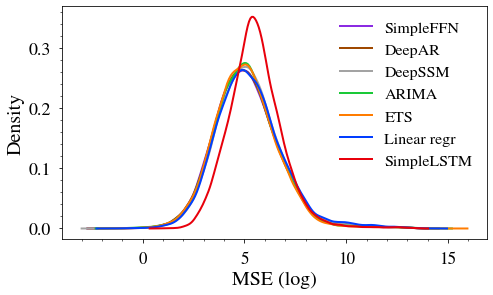

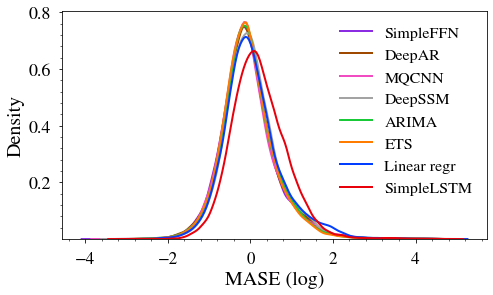

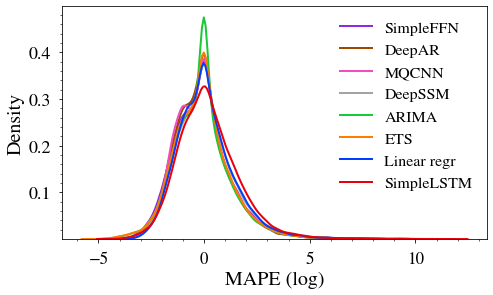

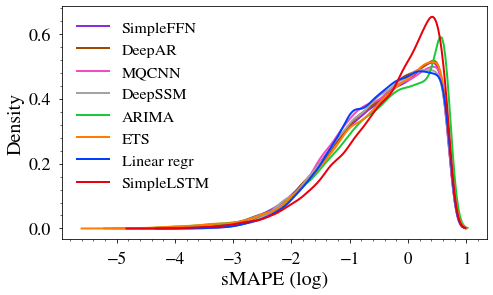

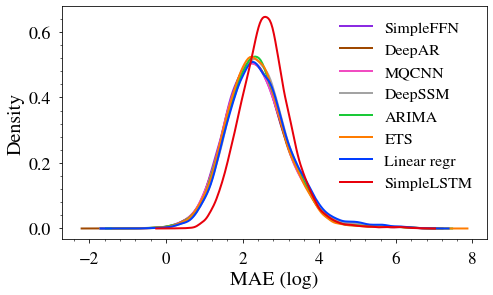

In [70]:
plt.style.use(os.path.join(configuration_dir, 'PaperSingleFig.mplstyle')) # half page width 


# avoid false positive SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

def plot_log_density(ax, metric, df):
    for gr, frame in df.groupby('predictor_id'):
        frame[f"log_{metric}"] = np.log(frame[metric])
        sns.kdeplot(
            data=frame, 
            x=f"log_{metric}",
            ax=ax,
            label=f"{legend_dict[gr]}",
            color=colour_dict[gr]
        )
    ax.legend(loc='best', frameon=False)
    ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
    return ax

###################################################################
# Mean Squared Error
###################################################################
fig, ax = plt.subplots()
ax = plot_log_density(
    ax=ax,
    metric='MSE',
    df=item_metrics
)
ax.set_xlabel('MSE (log)')
# plt.savefig(os.path.join(report_dir, 'images/kde-mse.pdf'), dpi=300)
plt.show()

# #################################################################
# # Mean Absolute Scaled Error 
# #################################################################
fig, ax = plt.subplots()
ax = plot_log_density(
    ax=ax,
    metric='MASE',
    df=item_metrics
)
ax.set_xlabel('MASE (log)')
# plt.savefig(os.path.join(report_dir, 'images/kde-mase.pdf'), dpi=300)
plt.show()

###################################################################
# Mean Absolute Percentage Error 
###################################################################
fig, ax = plt.subplots()
ax = plot_log_density(
    ax=ax,
    metric='MAPE',
    df=item_metrics
)
ax.set_xlabel('MAPE (log)')
# plt.savefig(os.path.join(report_dir, 'images/kde-mape.pdf'), dpi=300)
plt.show()


###################################################################
# Symmetric Mean Absolute Percentage Error 
###################################################################
fig, ax = plt.subplots()
ax = plot_log_density(
    ax=ax,
    metric='sMAPE',
    df=item_metrics
)
ax.set_xlabel('sMAPE (log)')
# plt.savefig(os.path.join(report_dir, 'images/kde-sMAPE.pdf'), dpi=300)
plt.show()

###################################################################
# Mean Absolute Error
###################################################################
fig, ax = plt.subplots()
ax = plot_log_density(
    ax=ax,
    metric='MAE',
    df=item_metrics
)

ax.set_xlabel('MAE (log)')
# plt.savefig(os.path.join(report_dir, 'images/kde-mae.pdf'), dpi=300)
plt.show()

# ###################################################################
# # Root Mean Squared Error
# ###################################################################
# fig, ax = plt.subplots()
# ax = plot_log_density(
#     ax=ax,
#     metric='RMSE',
#     df=item_metrics
# )

# ax.set_xlabel('RMSE (log)')
# # plt.savefig(os.path.join(report_dir, 'images/kde-rmse.pdf'), dpi=300)
# plt.show()

# ###################################################################
# # Normalized Root Mean Squared Error
# ###################################################################
# fig, ax = plt.subplots()
# ax = plot_log_density(
#     ax=ax,
#     metric='NRMSE',
#     df=item_metrics
# )

# ax.set_xlabel('NRMSE (log)')
# # plt.savefig(os.path.join(report_dir, 'images/kde-nrmse.pdf'), dpi=300)
# plt.show()

# ###################################################################
# # Normalized Difference
# ###################################################################
# fig, ax = plt.subplots()
# ax = plot_log_density(
#     ax=ax,
#     metric='ND',
#     df=item_metrics
# )

# ax.set_xlabel('ND (log)')
# # plt.savefig(os.path.join(report_dir, 'images/kde-nd.pdf'), dpi=300)
# plt.show()



### Violin plots forecast metrics

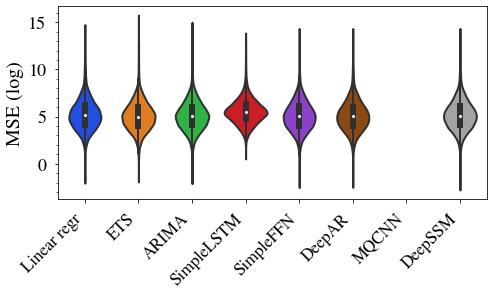

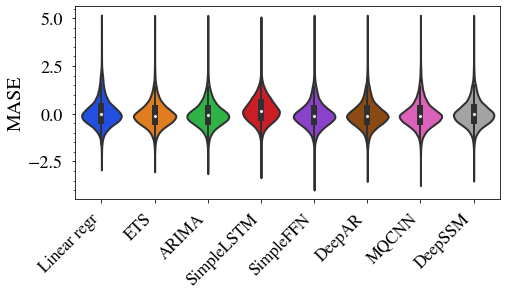

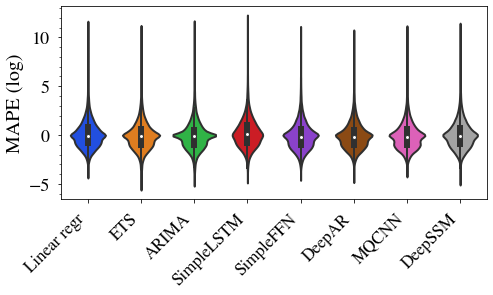

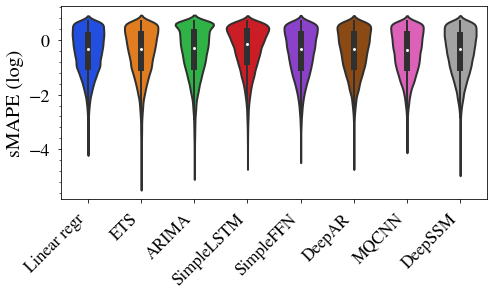

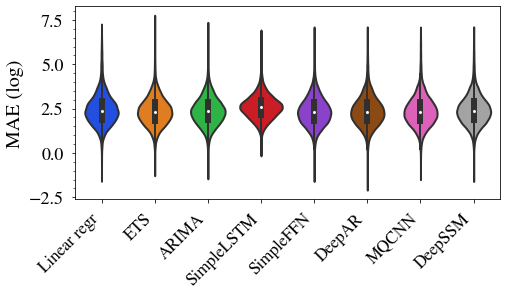

In [71]:
plt.style.use(os.path.join(configuration_dir, 'PaperSingleFig.mplstyle')) # use these for half page

def plot_log_violin(ax, metric, df):
    sns.violinplot(
        data=df,
        x="predictor",
        y=np.log(df[metric]),
        ax=ax,
        palette=colour_palette
    )
    ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
    inv_predictor_dict = dict(map(reversed, predictor_dict.items())) 
    ax.set_xticklabels(legend_dict.values(), rotation=45, ha="right")
    return ax


###################################################################
# Mean Squared Error 
###################################################################
fig, ax = plt.subplots()
ax = plot_log_violin(
    ax=ax,
    metric='MSE',
    df=item_metrics
)
ax.set_xlabel('')
ax.set_ylabel('MSE (log)')
# plt.savefig(os.path.join(report_dir, 'images/violin-mse.pdf'), dpi=300)
plt.show()

# #################################################################
# # Mean Absolute Scaled Error 
# #################################################################
fig, ax = plt.subplots()
ax = plot_log_violin(
    ax=ax,
    metric='MASE',
    df=item_metrics
)
ax.set_xlabel('')
ax.set_ylabel('MASE')
# plt.savefig(os.path.join(report_dir, 'images/violin-mase.pdf'), dpi=300)
plt.show()

#################################################################
# Mean Absolute Percentage Error 
#################################################################
fig, ax = plt.subplots()
ax = plot_log_violin(
    ax=ax,
    metric='MAPE',
    df=item_metrics
)
ax.set_xlabel('')
ax.set_ylabel('MAPE (log)')
# plt.savefig(os.path.join(report_dir, 'images/violin-mape.pdf'), dpi=300)
plt.show()

#################################################################
# Symmetric Mean Absolute Percentage Error 
#################################################################
fig, ax = plt.subplots()
ax = plot_log_violin(
    ax=ax,
    metric='sMAPE',
    df=item_metrics
)
ax.set_xlabel('')
ax.set_ylabel('sMAPE (log)')
# plt.savefig(os.path.join(report_dir, 'images/violin-smape.pdf'), dpi=300)
plt.show()

#################################################################
# Absolute Error 
#################################################################
fig, ax = plt.subplots()
ax = plot_log_violin(
    ax=ax,
    metric='MAE',
    df=item_metrics
)
ax.set_xlabel('')
ax.set_ylabel('MAE (log)')
# plt.savefig(os.path.join(report_dir, 'images/violin-ae.pdf'), dpi=300)
plt.show()

### Quantile Coverage plots

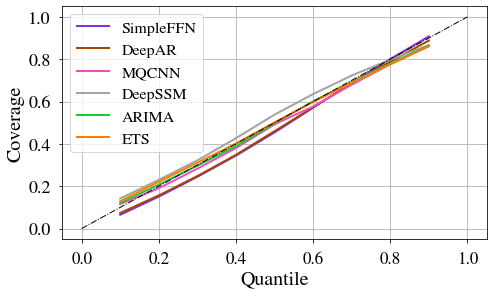

In [72]:
plt.style.use(os.path.join(configuration_dir, 'PaperSingleFig.mplstyle'))

coverage = item_metrics.groupby('predictor_id').mean().filter(regex='Coverage')
coverage_labels = np.arange(0.1, 1, step=0.1)

fig, ax = plt.subplots()
for idx, vals in coverage.dropna().iterrows():
    ax.plot(
        coverage_labels,
        vals.values,
        color=colour_dict[idx],
        label=legend_dict[idx]
    )
ax.plot(
    np.linspace(0, 1, 100), 
    np.linspace(0, 1, 100), 
    ls='-.',
    color='black',
    lw=1)
    
ax.grid(which='both')
ax.set_xlabel('Quantile')
ax.set_ylabel('Coverage')
ax.legend()

# plt.savefig(os.path.join(report_dir, 'images/quantile-coverage.pdf'), dpi=300)

### Quantile loss plot

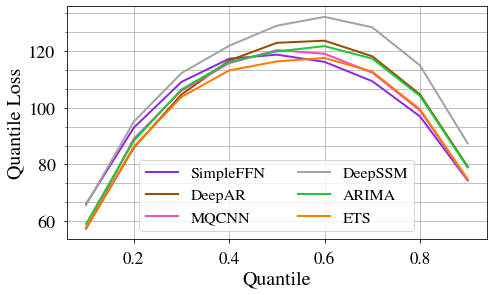

In [73]:
plt.style.use(os.path.join(configuration_dir, 'PaperSingleFig.mplstyle'))

loss = item_metrics.groupby('predictor_id').mean().filter(regex='QuantileLoss')
loss_labels = np.arange(0.1, 1, step=0.1)

fig, ax = plt.subplots()
for idx, vals in loss.dropna().iterrows():
    ax.plot(
        loss_labels,
        vals.values,
        color=colour_dict[idx],
        label=legend_dict[idx]
    )
ax.yaxis.set_minor_locator(  AutoMinorLocator(3))    
ax.grid(which='both')
ax.set_xlabel('Quantile')
ax.set_ylabel('Quantile Loss')
ax.legend(ncol=2)

# plt.savefig(os.path.join(report_dir, 'images/quantile-loss.pdf'), dpi=300)

### Robustness 

In [246]:
robustness = pd.read_csv(os.path.join(data_dir, 'robustness.csv'))

In [123]:
predictor_dict_r = dict(map(reversed, predictor_dict.items()))
predictor_colour_dict = {predictor_id_to_predictor[k]:v for k, v in colour_dict.items()}

In [156]:
predictor_to_predictor_id = predictor_dict
predictor_id_to_predictor = dict(map(reversed, predictor_to_predictor_id.items()))
predictor_to_colour = {predictor_id_to_predictor[k]:v for k, v in colour_dict.items()}
predictor_to_legend = dict(zip(predictor_to_predictor_id.keys(), legend_labels))

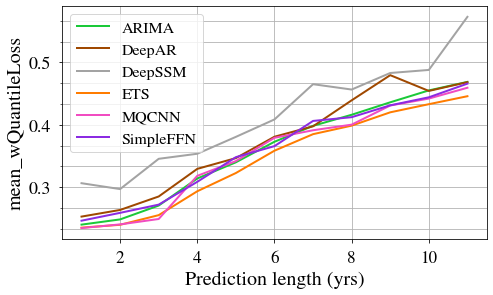

In [290]:
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator
import matplotlib as mpl


plt.style.use(os.path.join(configuration_dir, 'PaperSingleFig.mplstyle'))

robustness.loc[robustness['method_name']=="ets", 'predictor'] = "ETS"
robustness.loc[robustness['method_name']=="arima", 'predictor'] = "ARIMA"


def plot_metrics(ax, df, metric):
    for gr, df in robustness.groupby('predictor'):
        
        if df[metric].isna().all():
            continue
        
        ax.plot(
            df['prediction_length'], 
            df[metric],
            label=predictor_to_legend[gr],
            color=predictor_colour_dict[gr]
        )

    ax.set_ylabel(f'{metric}')
    ax.set_xlabel('Prediction length (yrs)')
    ax.yaxis.set_minor_locator(AutoMinorLocator(3))
    ax.grid(which="both")
    ax.legend(ncol=1, loc='best')
    return ax

fig, ax = plt.subplots()
plot_metrics(ax, robustness, metric='mean_wQuantileLoss')
plt.savefig(os.path.join(report_dir, 'images/robustness-mwql.pdf'), dpi=300)

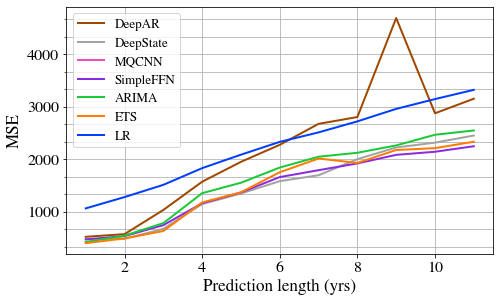

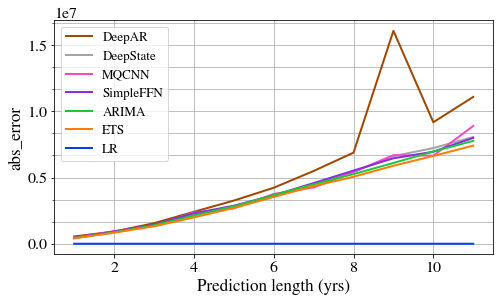

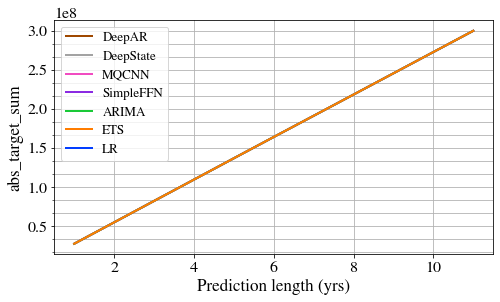

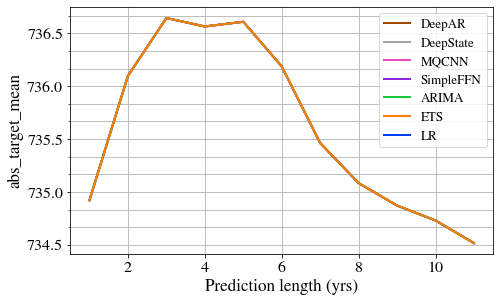

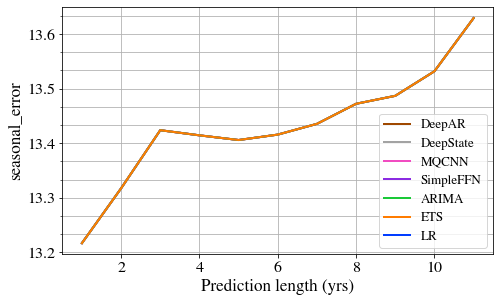

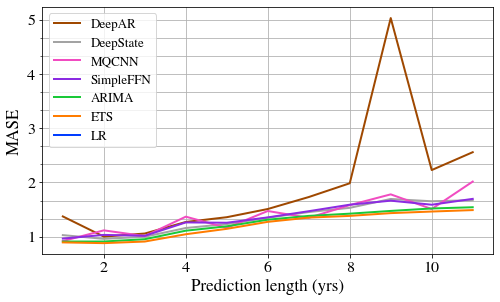

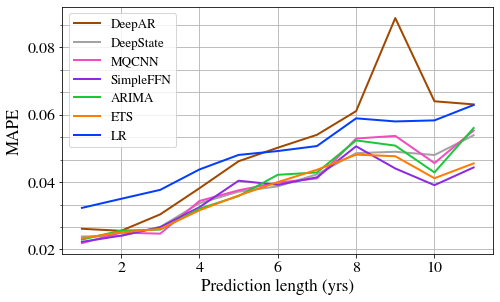

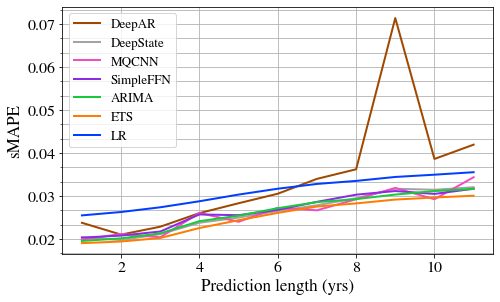

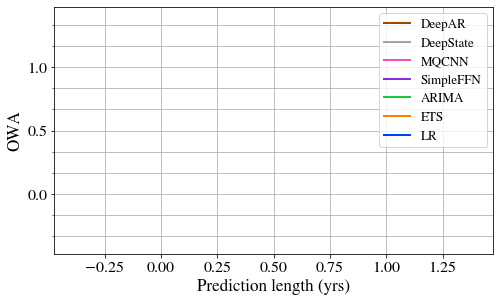

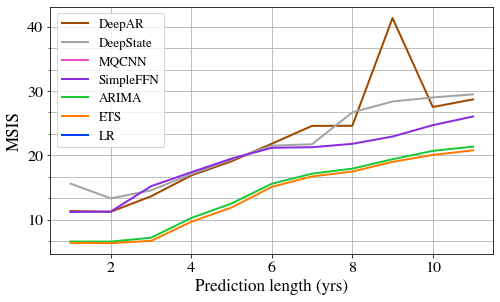

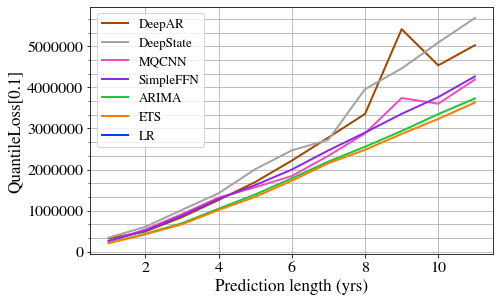

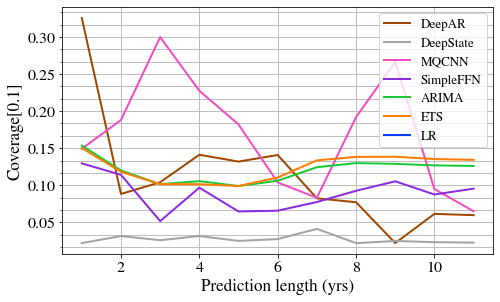

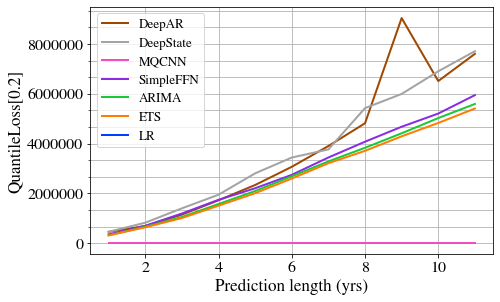

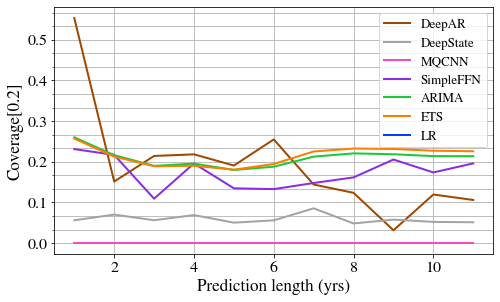

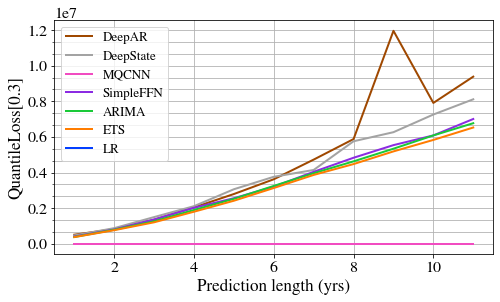

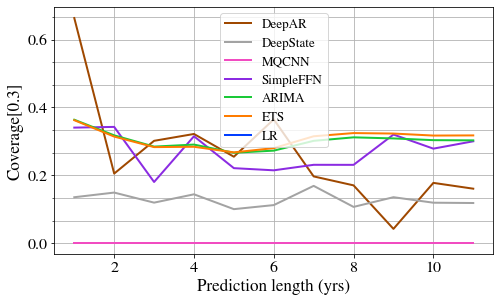

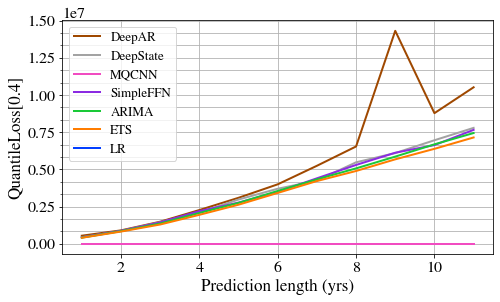

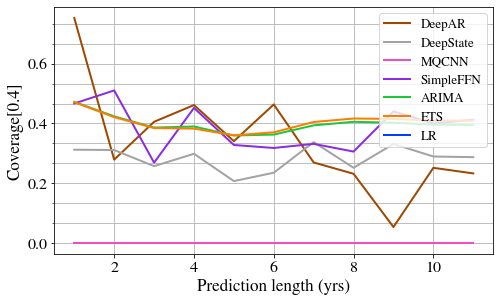

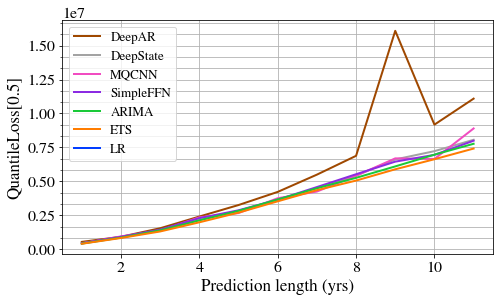

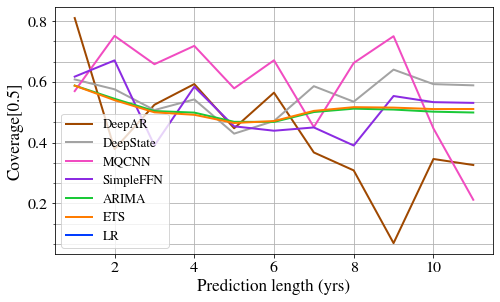

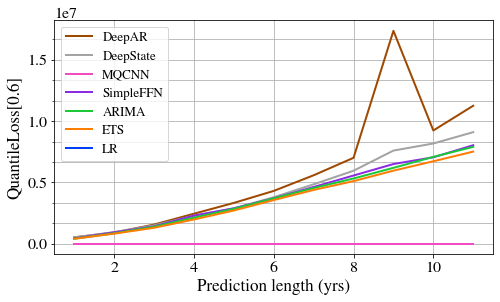

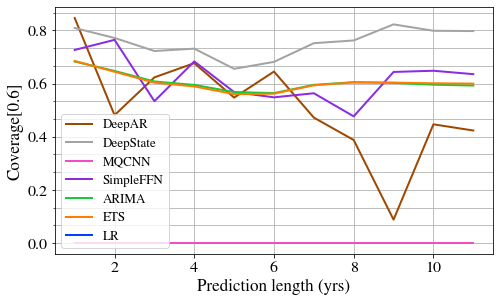

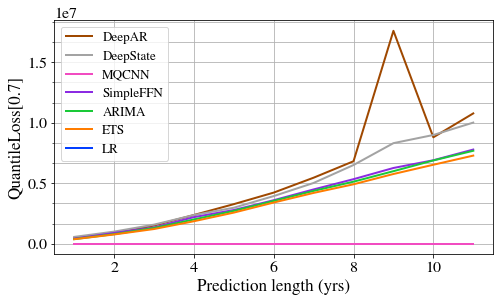

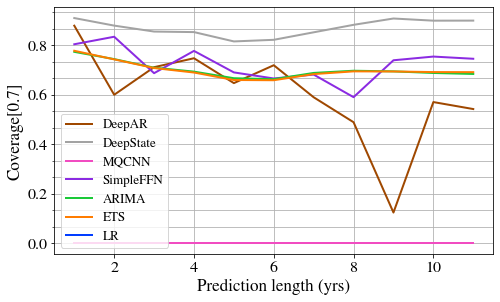

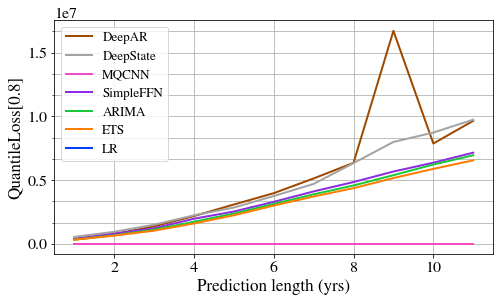

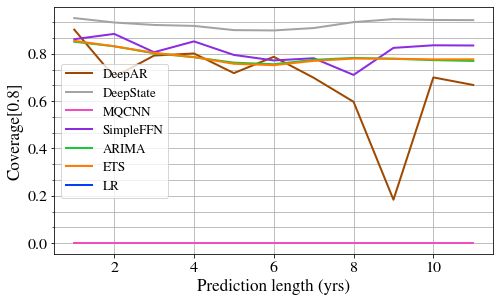

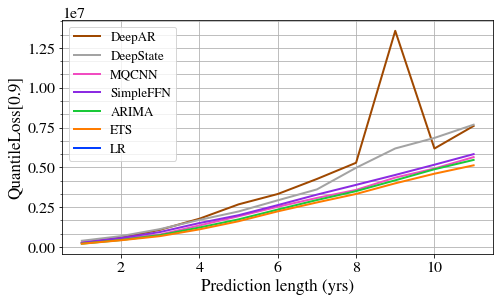

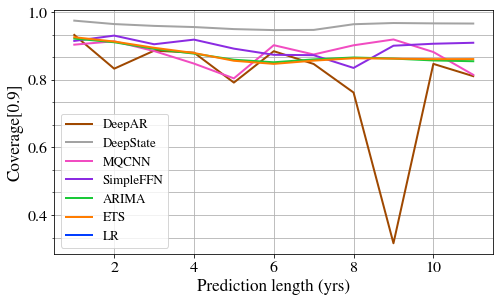

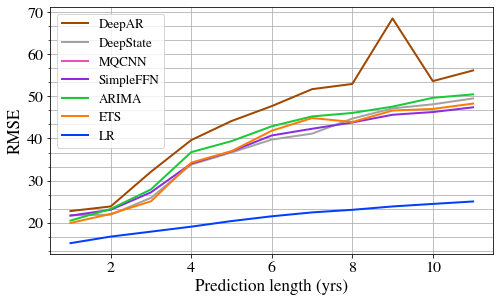

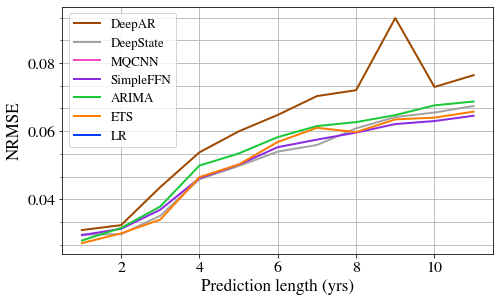

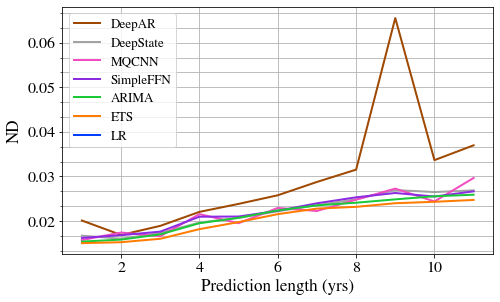

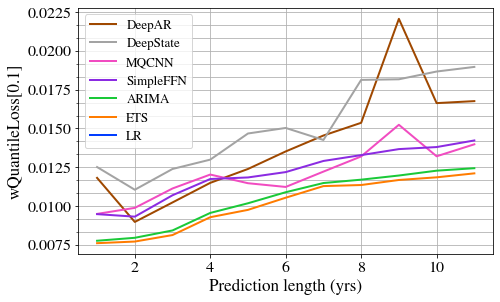

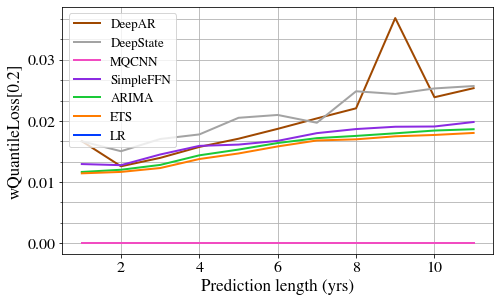

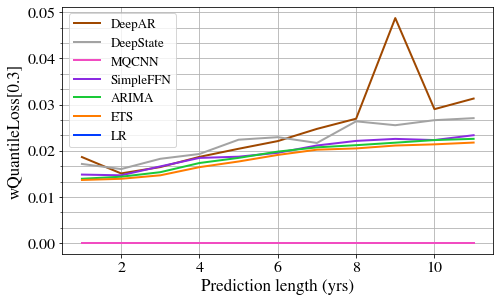

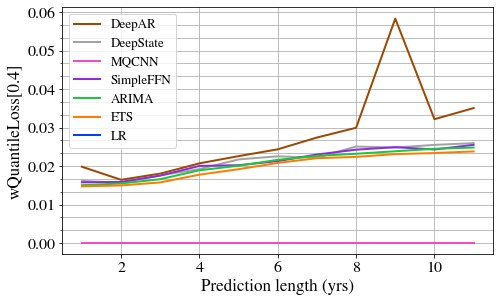

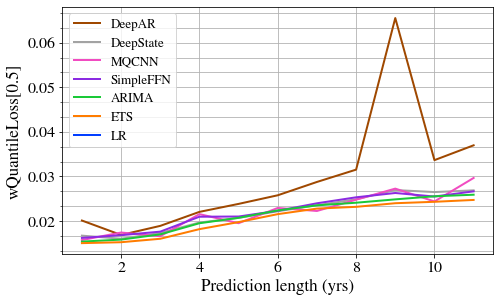

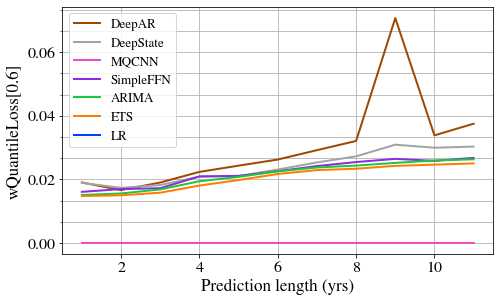

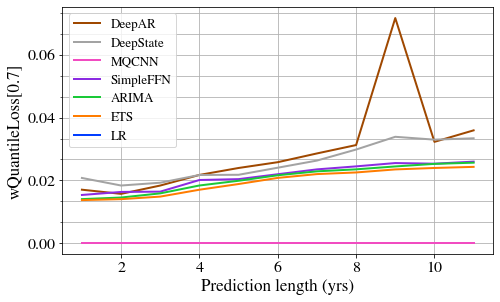

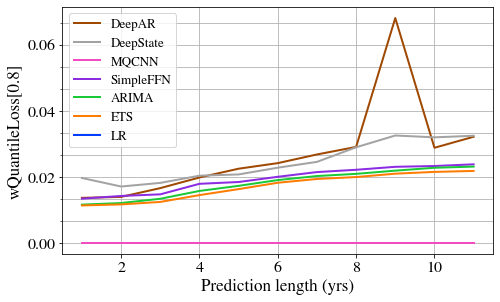

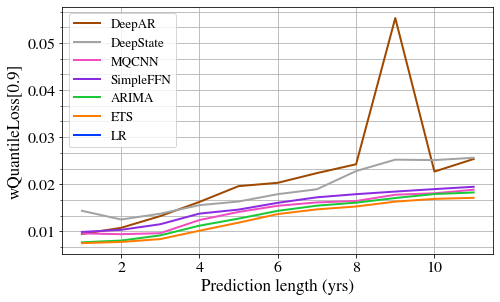

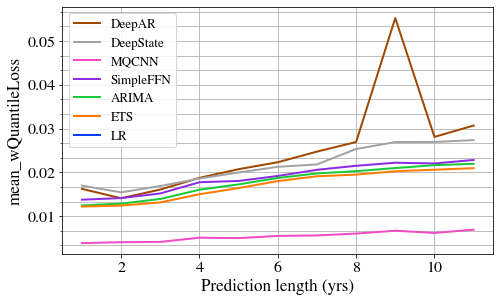

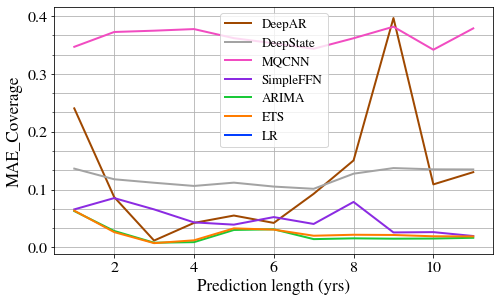

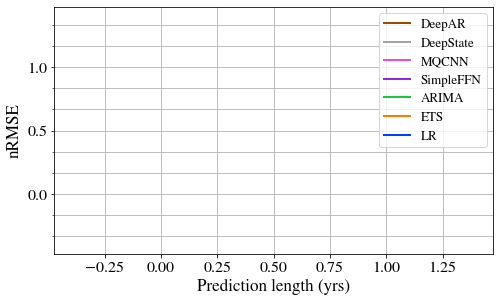

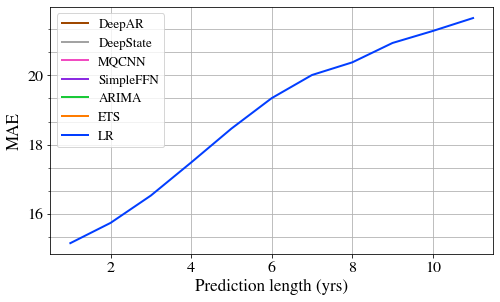

In [16]:
for metric in ['MSE', 'abs_error',
       'abs_target_sum', 'abs_target_mean', 'seasonal_error', 'MASE', 'MAPE',
       'sMAPE', 'OWA', 'MSIS', 'QuantileLoss[0.1]', 'Coverage[0.1]',
       'QuantileLoss[0.2]', 'Coverage[0.2]', 'QuantileLoss[0.3]',
       'Coverage[0.3]', 'QuantileLoss[0.4]', 'Coverage[0.4]',
       'QuantileLoss[0.5]', 'Coverage[0.5]', 'QuantileLoss[0.6]',
       'Coverage[0.6]', 'QuantileLoss[0.7]', 'Coverage[0.7]',
       'QuantileLoss[0.8]', 'Coverage[0.8]', 'QuantileLoss[0.9]',
       'Coverage[0.9]', 'RMSE', 'NRMSE', 'ND', 'wQuantileLoss[0.1]',
       'wQuantileLoss[0.2]', 'wQuantileLoss[0.3]', 'wQuantileLoss[0.4]',
       'wQuantileLoss[0.5]', 'wQuantileLoss[0.6]', 'wQuantileLoss[0.7]',
       'wQuantileLoss[0.8]', 'wQuantileLoss[0.9]', 'mean_wQuantileLoss',
       'MAE_Coverage', 'nRMSE', 'MAE']:
    fig, ax = plt.subplots()
    try: 
        plot_metrics(ax, robustness, metric=metric, excl_predictor=["DeepAREstimator-2"])
        plt.show()
    except:
        print(f'cannot plot {metric}')


In [60]:
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName


def traverse(o, tree_types=(list, tuple)):
    if isinstance(o, tree_types):
        for value in o:
            for subvalue in traverse(value, tree_types):
                yield subvalue
    else:
        yield o


def get_gluon_ds(df, metadata, sites, cat_vars=['fcluster', 'dbscan_cluster'], 
                 sample=None, shuffle=False, get_transects=None):
    
    if get_transects is not None:
        df = df.loc[get_transects]
    
    if sample is not None:
        df = df.sample(sample)
        
    if shuffle is True:
        df = df.sample(frac=1)
        
    metadata_ = metadata.copy()
    metadata_['num_series'] = len(df)
    metadata_['item_id'] = df.index.values
    metadata_['start'] = metadata['start'][:len(df)]
    
    sites_ = sites.copy()
    sites_ = sites_.loc[sites_['transect_id'].isin(df.index)]
    sites_ = sites_.set_index('transect_id')
    sites_ = sites_.reindex(df.index)
    
    features = dict()
    features['num_series'] = metadata_['num_series']
    for cat in traverse(cat_vars):
        features[cat] = sites_[cat].unique()
        features[cat] = sites_[cat].unique()
    features['cat_vars'] = cat_vars
    
    train_ds = ListDataset(
        [
         {
             FieldName.TARGET: target,
             FieldName.START: start,
             FieldName.ITEM_ID: item_id,
             FieldName.FEAT_STATIC_CAT: [fclust, dbclust],
             FieldName.FEAT_STATIC_REAL: [fsr]
          }

         for (target, start, item_id, fclust, dbclust, fsr) in zip(df.values[:, :-metadata_['prediction_length']],
                                            metadata_['start'], 
                                            metadata_['item_id'],
                                            sites_['fcluster'].values,
                                            sites_['dbscan_cluster'].values,
                                            sites_['changerate_unc'].values)
        ], freq=metadata_['freq'])

    test_ds = ListDataset(
        [
         {
             FieldName.TARGET: target,
             FieldName.START: start,
             FieldName.ITEM_ID: item_id,
             FieldName.FEAT_STATIC_CAT: [fclust, dbclust],
             FieldName.FEAT_STATIC_REAL: [fsr]
          }

         for (target, start, item_id, fclust, dbclust, fsr) in zip(df.values,
                                            metadata_['start'], 
                                            metadata_['item_id'],
                                            sites_['fcluster'].values,
                                            sites_['dbscan_cluster'].values,
                                            sites_['changerate_unc'].values)
        ], freq=metadata_['freq'])
          
    return train_ds, test_ds, features




In [61]:
metadata = {
    'num_series': len(tf),
    'num_steps': len(tf.columns),
    'prediction_length': 7,
    'freq': "AS",
    'start': [pd.Timestamp("01-01-1984", freq='AS') for _ in range(len(tf))],
    'item_id': tf.index.values,
    'epochs': 10,
    'save_model': True,
    'evaluate_model': True,
}


In [62]:
from pathlib import Path
from gluonts.model.predictor import Predictor


simpleffn_path = os.path.join(model_dir, 'SimpleFeedForwardEstimator-419')
deepar_path = os.path.join(model_dir, 'DeepAREstimator-420')
mqccn_path = os.path.join(model_dir, 'MQCNNEstimator-421')
deepssm_path = os.path.join(model_dir, 'DeepStateEstimator-422')

simpleffn = Predictor.deserialize(Path(simpleffn_path))
deepar = Predictor.deserialize(Path(deepar_path))
mqcnn = Predictor.deserialize(Path(mqccn_path))
deepssm = Predictor.deserialize(Path(deepssm_path))

In [63]:
from gluonts.model.r_forecast import RForecastPredictor
from gluonts.evaluation.backtest import make_evaluation_predictions


def get_rforecast_predictor(method: str):
    return RForecastPredictor(
        freq=metadata['freq'],
        prediction_length=metadata['prediction_length'],
        method_name = method
    )


train_ds, test_ds, features = get_gluon_ds(
    df=tf_t,
    metadata=metadata,
    sites=sites,
    shuffle=False,
    sample=None,
    get_transects=duck_dbscan_z.index.to_list()
)


arima_it = make_evaluation_predictions(
    test_ds, predictor=get_rforecast_predictor("arima"), num_samples=300
)

ets_it = make_evaluation_predictions(
    test_ds, predictor=get_rforecast_predictor("ets"), num_samples=300
)

simpleffn_it = make_evaluation_predictions(
    test_ds, predictor=simpleffn, num_samples=300
)

deepar_it = make_evaluation_predictions(
    test_ds, predictor=deepar, num_samples=300
)

mqcnn_it = make_evaluation_predictions(
    test_ds, predictor=mqcnn, num_samples=300
)

deepssm_it = make_evaluation_predictions(
    test_ds, predictor=deepssm, num_samples=300
)

In [94]:
import folium 


def add_to_map(m, transect_ids):
    for i in transect_ids:
        row = geosites.loc[sites['transect_id']==i]
        folium.CircleMarker(
            location=[row['geometry'].y, row['geometry'].x],
            color=np.random.choice(folium_colors),
            fill_color=np.random.choice(folium_colors)
        ).add_to(m)

        
def plot_prob_forecast(ax, ts, fcst):
    prediction_intervals = (50.0, 90.0)
    prediction_intervals = (50.0)
    ts.plot(ax=ax, label='test') 
    fcst.plot(
#         prediction_intervals=prediction_intervals,
        color='g',
    ) 
    ax.axvline(x=ts.index[-(len(fcst.median)+1)], color='red', linestyle='--')
    ax.set_ylabel('Shoreline position (m)')
    ax.set_xlabel('Time (yrs)')
    ax.grid(which="both")
    l = ax.legend()
    l.get_texts()[0].set_text('observed')
    return ax



In [95]:
folium_colors = [
    'red', 'blue', 'gray', 'darkred', 'lightred', 'orange', 'beige',
    'green', 'darkgreen', 'lightgreen', 'darkblue', 'lightblue',
    'purple', 'darkpurple', 'pink', 'cadetblue', 'lightgray', 'black'
]

In [96]:
m = folium.Map(location=(0,0), zoom_start=1)

In [119]:
for i in [simpleffn_it, deepar_it, mqcnn_it, deepssm_it]:
    ts = next(i[1])
    fcst = next(i[0])
    fig, ax = plt.subplots()
    plot_prob_forecast(ax, ts, fcst)
    plt.show()
add_to_map(m, [fcst.item_id])
tf_t.loc[fcst.item_id].plot(label=fcst.item_id)
plt.legend()
print(fcst.item_id)



StopIteration: 

In [112]:
interest = ['BOX_160_055_340', 'BOX_160_055_341', 'BOX_160_055_342']

In [68]:
m

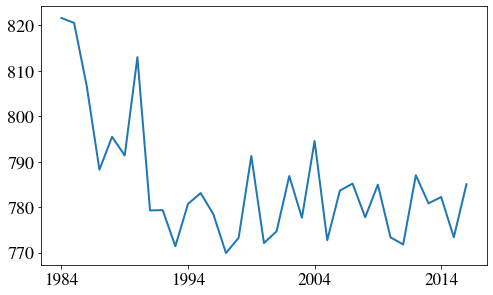

In [73]:
tf.loc['BOX_160_055_318'].plot()

In [476]:
np.random.choice(sites['transect_id'], size=10)

array(['BOX_172_196_36', 'BOX_138_320_131', 'BOX_074_032_16',
       'BOX_173_019_59', 'BOX_172_065_22', 'BOX_173_002_57',
       'BOX_160_007_193', 'BOX_096_045_28', 'BOX_138_455_40',
       'BOX_137_233_8'], dtype=object)

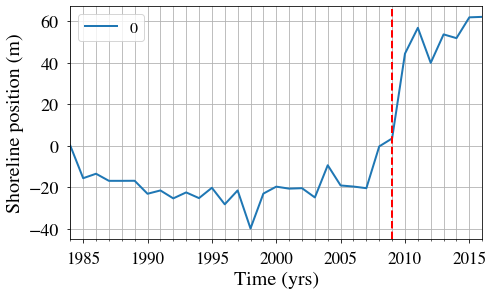

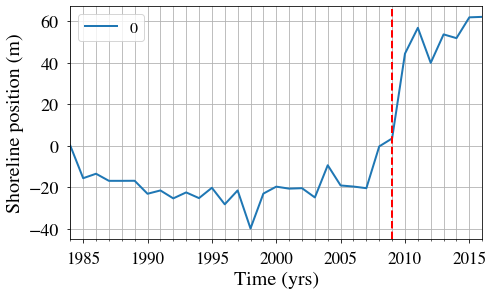

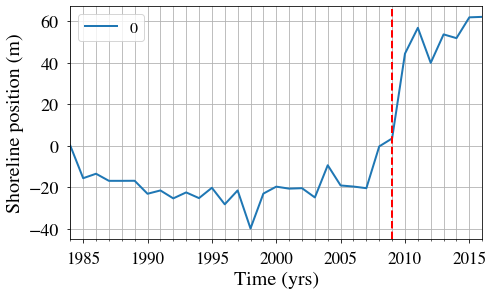

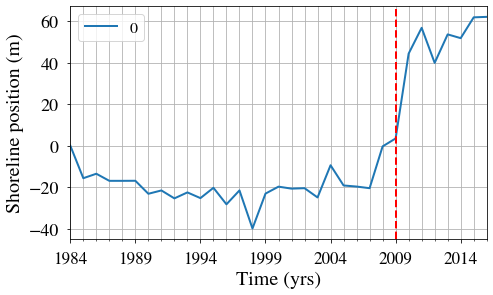

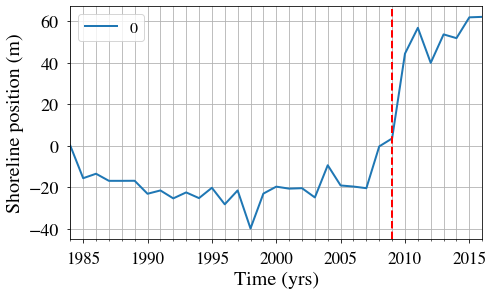

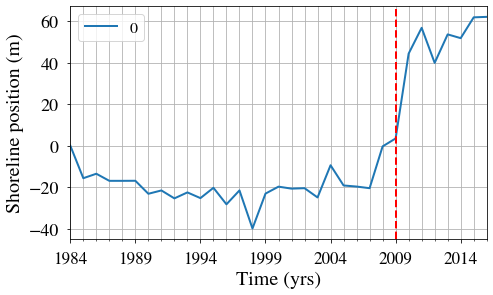

In [453]:
for i in [arima_it, ets_it, simpleffn_it, deepar_it, mqcnn_it, deepssm_it]:
    fig, ax = plt.subplots()
    plot_prob_forecast(ax, next(i[1]), next(i[0]))
    plt.show()